# Понижение размерности при анализе транскриптомных данных

In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

In [83]:
escc = pd.read_csv("./data/gse53625_expression.csv", index_col=0)
escc_meta = pd.read_csv("./data/gse53625_metadata.csv", index_col=0)

In [84]:
# escc - esophageal squamous cell carcinoma
# строки - идентификаторы гена, столбцы - образцы. Значения - показатель того как хорошо экспрессируется ген. Они пропорциональны интенсивности флуоресценции меченых РНК. 
escc

,GSM1296956,GSM1296957,GSM1296958,GSM1296959,GSM1296960,GSM1296961,GSM1296962,GSM1296963,GSM1296964,GSM1296965,...,GSM1297304,GSM1297305,GSM1297306,GSM1297307,GSM1297308,GSM1297309,GSM1297310,GSM1297311,GSM1297312,GSM1297313
gene,,,,,,,,,,,,,,,,,,,,,
89253,6.879,6.592,6.932,6.337,6.758,6.839,6.592,6.597,6.920,7.460,...,6.739,7.207,6.994,7.414,6.694,7.209,6.730,7.413,5.397,4.771
9622,5.809,7.015,7.177,7.086,7.168,7.262,6.209,6.239,5.873,5.988,...,6.835,6.991,7.450,6.582,6.643,6.997,7.010,6.860,7.699,7.838
13079,8.259,8.189,9.278,8.162,10.033,8.016,9.154,7.965,8.880,8.128,...,8.521,7.371,9.728,8.795,6.985,7.837,8.771,7.805,7.511,5.752
100371,12.485,12.897,11.922,13.491,12.565,13.326,12.933,13.299,12.799,13.257,...,13.330,13.792,12.975,12.994,11.857,12.859,12.128,13.637,12.171,12.516
38363,10.261,9.215,9.532,9.756,9.770,9.158,9.666,10.082,9.507,9.356,...,11.332,10.898,9.852,9.888,10.010,10.179,10.182,10.370,11.386,14.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151317,11.135,11.515,10.957,11.411,10.796,11.377,10.831,10.959,11.592,11.443,...,11.580,11.423,10.920,12.096,12.162,11.968,11.608,11.747,11.400,10.648
18568,6.709,3.919,4.987,4.895,4.424,4.656,4.844,5.766,4.843,5.279,...,4.840,4.241,4.373,4.225,3.577,3.233,4.043,3.576,5.317,7.278
34524,7.093,6.978,7.931,7.355,7.672,7.529,7.894,7.354,7.750,8.157,...,6.936,7.006,7.123,7.138,6.754,6.980,6.672,6.883,7.401,7.922


In [85]:
escc_meta

,Sample type,Patient ID,Dataset
GEO accession,,,
GSM1296956,cancer,ec302,GSE53622
GSM1296957,normal,ec302,GSE53622
GSM1296958,cancer,ec303,GSE53622
GSM1296959,normal,ec303,GSE53622
GSM1296960,cancer,ec305,GSE53622
...,...,...,...
GSM1297309,normal,ec97,GSE53624
GSM1297310,cancer,ec101,GSE53624
GSM1297311,normal,ec101,GSE53624


In [86]:
#Транспонируем так как признаки - это гены, а GSM - образцы

X = escc.values.T
y = escc_meta["Sample type"]
batch = escc_meta["Dataset"]

Понизим размерность с помощью PCA

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

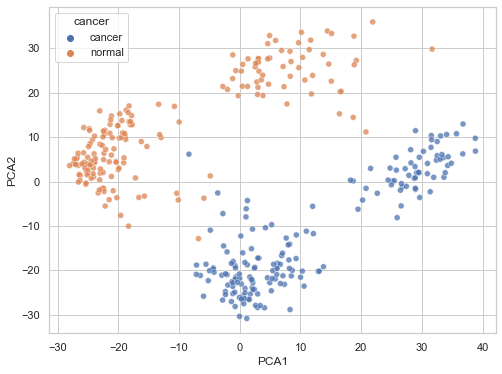

In [88]:
df = pd.DataFrame({"PCA1": X_pca[:,0],
                  "PCA2": X_pca[:,1],
                  "cancer": y})
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="cancer", data=df, alpha=0.75)

Видно что среди нормальных клеток есть два кластера, хотя ожидается один, так как все нормальные клетки по идее примерно похожи. Это связано с batch-эффектом. Из-за отличий в условиях проведения экспериментов те же самые нормальные клетки оказались сдвинуты на разных датасетах(GSE).

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

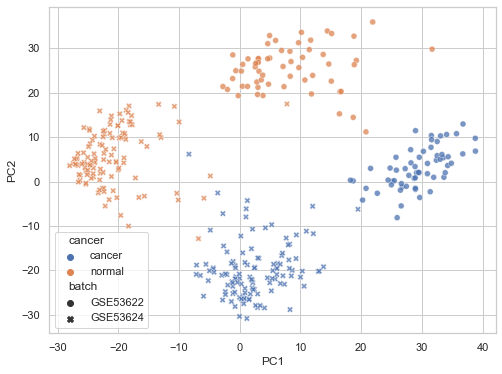

In [89]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                  "PC2": X_pca[:,1],
                  "cancer": y,
                  "batch": batch})
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", style = "batch", data=df, alpha=0.75)

Видно, что два дополнительных кластера относятся к другой экспериментальной серии. Значит вероятнее всего это различие в проведении эксперимента, а не биологическая значимость.

In [90]:
total_explained = pca.explained_variance_ratio_.sum()
print(total_explained)

0.3256636566253004


Проведем стандартизацию

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [93]:
total_explained = pca.explained_variance_ratio_.sum()
print(total_explained)

0.3144054751789659


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

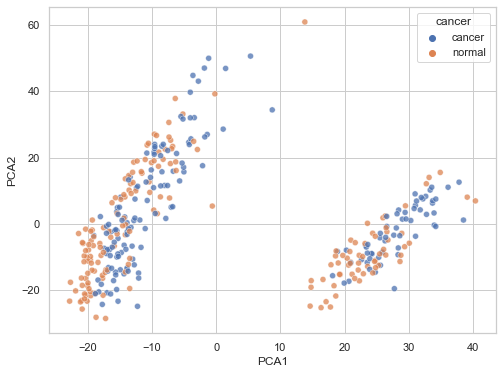

In [94]:
df = pd.DataFrame({"PCA1": X_pca[:,0],
                  "PCA2": X_pca[:,1],
                  "cancer": y})
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="cancer", data=df, alpha=0.75)

Для устранения batch-эффекта используем пакет pyComBat

In [95]:
# !pip install combat

In [96]:
from combat.pycombat import pycombat
escc_corrected = pycombat(escc, escc_meta["Dataset"])

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [97]:
escc_corrected.to_csv("./data/gse53625_expression_corrected.csv")

In [98]:
X = escc_corrected.values.T

In [99]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

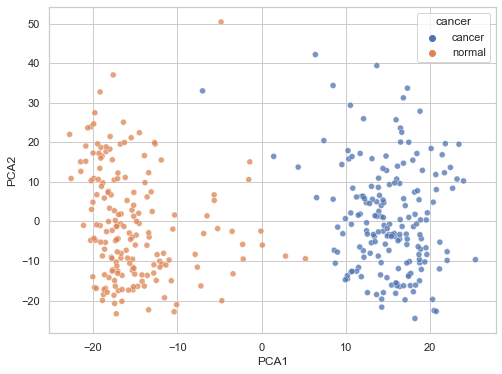

In [100]:
df = pd.DataFrame({"PCA1": X_pca[:,0],
                  "PCA2": X_pca[:,1],
                  "cancer": y})
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="cancer", data=df, alpha=0.75)

In [101]:
total_explained = pca.explained_variance_ratio_.sum()
print(total_explained)

0.3472441552625737


Проведем стандартизацию

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [104]:
total_explained = pca.explained_variance_ratio_.sum()
print(total_explained)

0.2845407761861121


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

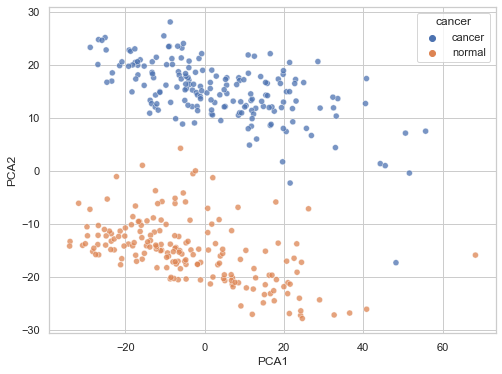

In [105]:
df = pd.DataFrame({"PCA1": X_pca[:,0],
                  "PCA2": X_pca[:,1],
                  "cancer": y})
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="cancer", data=df, alpha=0.75)

После коррекции батч-эффекта различий между образцами уже не наблюдается

С помощью SVC сделаем классификацию на исходных данных и на данных сниженной размерности.

In [106]:
from sklearn.model_selection import train_test_split

X = X_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [107]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1) 
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [108]:
y_model = svm_clf.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_model)

0.9861111111111112

Определим оптимальное n для PCA

In [110]:
n = np.min(X_train.shape)
min_disp = 0.95

In [111]:
pca = PCA(n_components = n)
X_pca = pca.fit_transform(X_train)

total_explained = np.cumsum(pca.explained_variance_ratio_)
best_n = np.argmax(total_explained >= min_disp) + 1
best_n

179

In [118]:
pca = PCA(n_components=179)
pca.fit(X_train)

X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_t_train, y_train)

SVC(C=1, kernel='linear')

In [119]:
y_model = svm_clf.predict(X_t_test)

In [120]:
accuracy_score(y_test, y_model)

0.9861111111111112

На выбранном значении n точность уже не отличается от точности на всех данных.